# Machine Learning With Python: Linear Regression With One Variable

importing librarys

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing data

In [13]:
path = './/Population_data.txt'
data = pd.read_csv(path,names=['Population','Profit'])

draw data

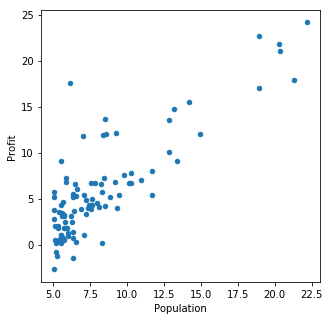

In [14]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

adding a new column called ones before the data

In [15]:
data.insert(0, 'Ones', 1)

separate X (training data) from y (target variable)

In [16]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

convert from data frames to numpy matrices

In [17]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

cost function

In [18]:
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

Gradient Descent function

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
 
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


nitialize variables for learning rate and iterations

In [20]:
alpha = 0.01
iters = 1000

perform gradient descent to "fit" the model parameters

In [21]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

get best fit line

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

draw the line

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

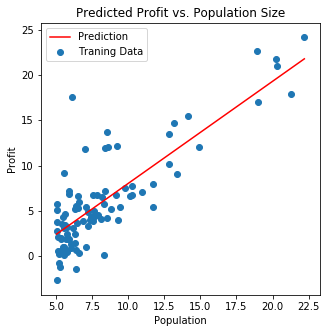

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

draw error graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

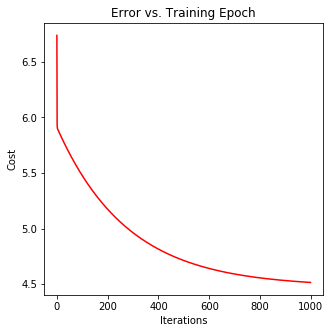

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')